In [83]:
#!/usr/bin/Rscript

if (!require("pacman")) install.packages("pacman")
pacman::p_load(ggplot2, data.table, foreach, sqldf, tidyr, stringr, dplyr)
RESEARCH_HOME = Sys.getenv(c("RESEARCH_HOME"))
PATH = "Scripts/Python/data/"
SAVE_PDF = F
W = 6
H = 6

data = read.csv(paste0(RESEARCH_HOME, PATH, 'output.csv'), header = F, sep = ";")

names(data) = c("runID", "Date", "Method", "Cores", "Epsilon", "Mu", "Delta", "methodTime"
               , "n", "timestamp", "Stage", "stageTime", "Load", "Unit")
data$Cores      = as.numeric(as.character(data$Cores))
data$Epsilon    = as.numeric(as.character(data$Epsilon))
data$Mu         = as.numeric(as.character(data$Mu))
data$Delta      = as.numeric(as.character(data$Delta))
data$methodTime = as.numeric(as.character(data$methodTime))
data$stageTime  = as.numeric(as.character(data$stageTime))

query = paste0("
SELECT
    Method, Epsilon, Mu, Delta, AVG(methodTime) AS Time
FROM
    data
GROUP BY
    Method, Epsilon, Mu, Delta
ORDER BY
    Epsilon, Mu, Delta
")
df = sqldf(query)
df

Method      Epsilon Mu Delta Time     
1  MergeLast   10      4  5     1833.3287
2  SpatialJoin 10      4  5      508.8940
3  MergeLast   20      4  5     2253.2947
4  SpatialJoin 20      4  5      714.8383
5  MergeLast   30      3  5     3219.3860
6  SpatialJoin 30      3  5      935.4593
7  MergeLast   30      4  3     1976.0103
8  SpatialJoin 30      4  3      699.9853
9  MergeLast   30      4  5     2950.7193
10 SpatialJoin 30      4  5     1046.5244
11 MergeLast   30      4  7     6472.3243
12 SpatialJoin 30      4  7     7226.9740
13 MergeLast   30      5  5     4752.1143
14 SpatialJoin 30      5  5     2039.9223

In [46]:
library(sqldf)

muDefault      = 4
deltaDefault   = 5
epsilonDefault = 30

In [72]:
query = paste0("
SELECT 
    Method, Epsilon, AVG(methodTime) AS Time
FROM 
    data 
WHERE
    delta = ", deltaDefault,"
    AND Mu = ", muDefault,"
GROUP BY
    Method, Epsilon
ORDER BY
    Epsilon
")
df = sqldf(query)
df
title = "Execution time by Epsilon"
g = ggplot(data=df, aes(x=factor(Epsilon), y=Time, fill=Method)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  labs(title=title, y="Time(s)", x=expression(paste(epsilon,"(mts)"))) 
plot(g)

Method      Epsilon Time     
1 MergeLast   10      1833.3287
2 SpatialJoin 10       508.8940
3 MergeLast   20      2253.2947
4 SpatialJoin 20       714.8383
5 MergeLast   30      2950.7193
6 SpatialJoin 30      1046.5244

Method      Delta Time     
1 MergeLast   3     1976.0103
2 SpatialJoin 3      699.9853
3 MergeLast   5     2950.7193
4 SpatialJoin 5     1046.5244
5 MergeLast   7     6472.3243
6 SpatialJoin 7     7226.9740

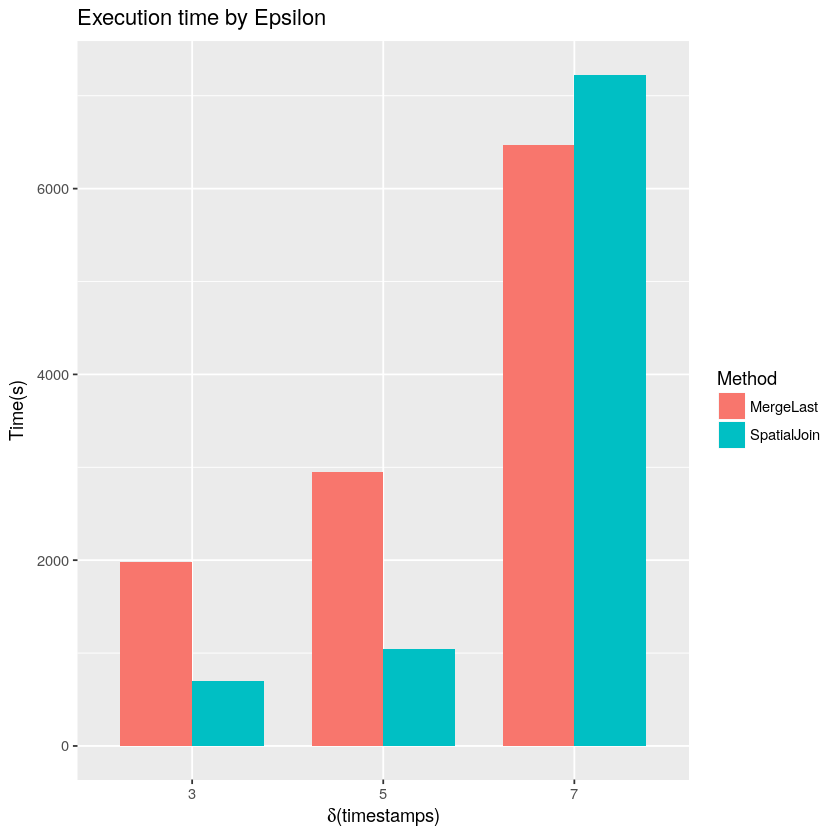

In [55]:
query = paste0("
SELECT 
    Method, Delta, AVG(methodTime) AS Time
FROM 
    data 
WHERE
    Epsilon = ", epsilonDefault,"
    AND Mu = ", muDefault,"
GROUP BY
    Method, Delta
ORDER BY
    Delta
")
df = sqldf(query)
df
title = "Execution time by Delta"
g = ggplot(data=df, aes(x=factor(Delta), y=Time, fill=Method)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  labs(title=title, y="Time(s)", x=expression(paste(delta,"(timestamps)"))) 
)
plot(g)

Method      Mu Time     
1 MergeLast   3  3219.3860
2 SpatialJoin 3   935.4593
3 MergeLast   4  2950.7193
4 SpatialJoin 4  1046.5244
5 MergeLast   5  4752.1143
6 SpatialJoin 5  2039.9223

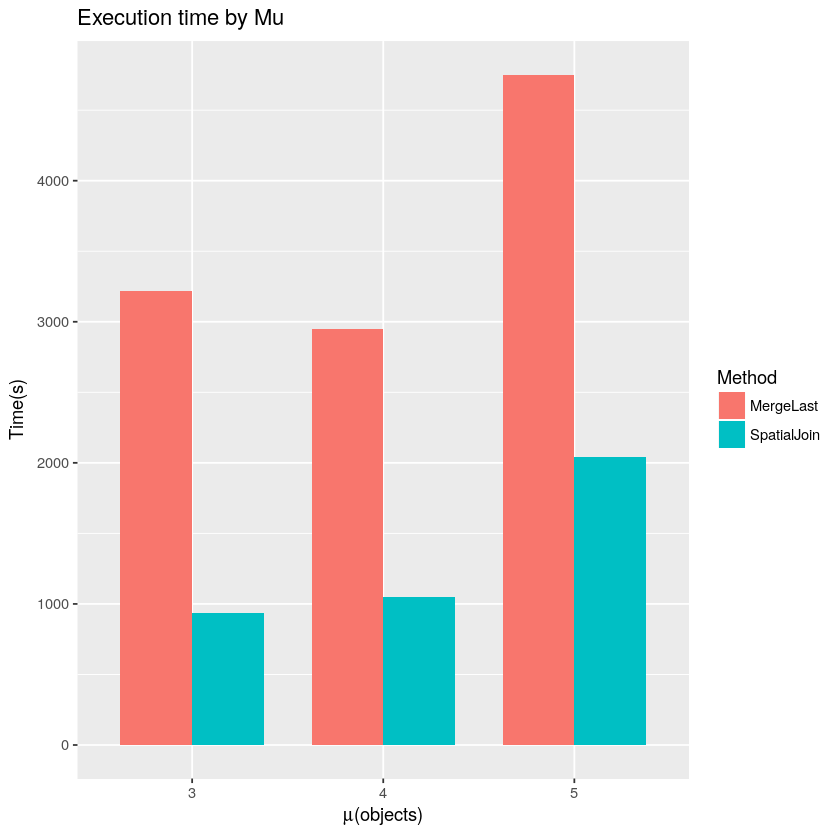

In [56]:
query = paste0("
SELECT 
    Method, Mu, AVG(methodTime) AS Time
FROM 
    data 
WHERE
    Epsilon = ", epsilonDefault,"
    AND Delta = ", deltaDefault,"
GROUP BY
    Method, Mu
ORDER BY
    Mu
")
df = sqldf(query)
df
title = "Execution time by Mu"
g = ggplot(data=df, aes(x=factor(Mu), y=Time, fill=Method)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  labs(title=title, y="Time(s)", x=expression(paste(mu,"(objects)"))) 

plot(g)

In [76]:
query = paste0("
SELECT
    Epsilon, Stage, AVG(stageTime) AS Time
FROM
    data
WHERE
    delta = ", deltaDefault,"
    AND Mu = ", muDefault,"
    AND method LIKE 'MergeLast'
    AND Stage != 'Running MergeLast...'
GROUP BY
    Epsilon, Stage
ORDER BY
    Epsilon
")
df = sqldf(query)
title = "Execution time in MergeLast by Stage and Epsilon"
g = ggplot(data=df, aes(x=factor(Epsilon), y=Time, fill=Stage)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  labs(title=title, y="Time(s)", x=expression(paste(epsilon,"(mts)"))) 

plot(g)

In [109]:
query = paste0("
SELECT
    Delta, Stage, AVG(stageTime) AS Time
FROM
    data
WHERE
    epsilon = ", epsilonDefault,"
    AND Mu = ", muDefault,"
    AND method LIKE 'MergeLast'
    AND Stage != 'Running MergeLast...'
GROUP BY
    Delta, Stage
ORDER BY
    Delta
")
df = sqldf(query)
title = "Execution time in MergeLast by Stage and Delta"
g = ggplot(data=df, aes(x=factor(Delta), y=Time, fill=Stage)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  labs(title=title, y="Time(s)", x=expression(paste(delta,"(timestamps)")))

plot(g)

In [133]:
library(doBy)
query = paste0("
SELECT
    Epsilon, Mu, Delta, Stage, stageTime AS Time
FROM
    data
WHERE
    epsilon = ", epsilonDefault,"
    AND Mu = ", muDefault,"
    AND method LIKE 'MergeLast'
    AND Stage != 'Running MergeLast...'
ORDER BY
    date
")
df = sqldf(query)
df = summaryBy(data=df, Time ~ Epsilon + Mu + Delta + Stage, FUN = function(x){ c(m=mean(x), s=sd(x)) })
df

Epsilon Mu Delta Stage                          Time.m     Time.s     
1  30      4  3     1.Getting disks                165.935185  85.1852385
2  30      4  3     2.Joining timestams              8.392593   0.5982834
3  30      4  3     3.Distance Join phase...         7.091111   0.4125841
4  30      4  3     4.Getting candidates...          6.006296   0.6124362
5  30      4  3     5.Checking internal timestamps   8.000000   0.8887589
6  30      4  5     1.Getting disks                224.185079  92.5455535
7  30      4  5     2.Joining timestams              9.934127   1.2382123
8  30      4  5     3.Distance Join phase...        11.940635   4.6513634
9  30      4  5     4.Getting candidates...          9.622857   3.0432925
10 30      4  5     5.Checking internal timestamps  14.293651   4.2869477
11 30      4  7     1.Getting disks                312.288000 160.1496813
12 30      4  7     2.Joining timestams             23.648000  28.0512170
13 30      4  7     3.Distance Join phase...        21.117200  38.9189655
14 30      4  7     4.Getting candidates...         23.156533  71.9478697
15 30      4  7     5.Checking internal timestamps  22.693333  21.4551222

In [141]:
title = "Execution time in MergeLast by Stage and Delta"
g = ggplot(data=df, aes(x=factor(Delta), y=Time.m, fill=Stage, ymin = Time.m-Time.s, ymax = Time.m+Time.s)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  geom_pointrange(position=position_dodge(width = 0.75)) +
  labs(title=title, y="Time(s)", x=expression(paste(delta,"(timestamps)")))

plot(g)

In [156]:
query = paste0("
SELECT
     runID, Epsilon, Mu, Delta, Stage, stageTime AS Time, load, unit
FROM
    data
WHERE
    epsilon = ", epsilonDefault,"
    AND Mu = ", muDefault,"
    AND method LIKE 'MergeLast'
    AND Stage = '1.Getting disks'
ORDER BY
    Epsilon, Mu, Delta, n
")
df = sqldf(query)
df

runID Epsilon Mu Delta Stage           Time   Load Unit 
1   36    30      4  3     1.Getting disks 495.79 432  disks
2   36    30      4  3     1.Getting disks 163.96 441  disks
3   36    30      4  3     1.Getting disks  94.99 465  disks
4   36    30      4  3     1.Getting disks  99.20 459  disks
5   36    30      4  3     1.Getting disks 103.94 460  disks
6   36    30      4  3     1.Getting disks 107.90 465  disks
7   36    30      4  3     1.Getting disks 103.63 441  disks
8   36    30      4  3     1.Getting disks 118.01 441  disks
9   36    30      4  3     1.Getting disks 119.93 430  disks
10  42    30      4  3     1.Getting disks 277.26 432  disks
11  42    30      4  3     1.Getting disks 292.21 441  disks
12  42    30      4  3     1.Getting disks 174.13 465  disks
13  42    30      4  3     1.Getting disks 183.85 459  disks
14  42    30      4  3     1.Getting disks 193.35 460  disks
15  42    30      4  3     1.Getting disks 200.15 465  disks
16  42    30      4  3     1.Getting disks 198.01 441  disks
17  42    30      4  3     1.Getting disks 208.37 441  disks
18  42    30      4  3     1.Getting disks 212.18 430  disks
19  48    30      4  3     1.Getting disks 156.78 432  disks
20  48    30      4  3     1.Getting disks 173.98 441  disks
21  48    30      4  3     1.Getting disks 102.80 465  disks
22  48    30      4  3     1.Getting disks 107.98 459  disks
23  48    30      4  3     1.Getting disks 109.49 460  disks
24  48    30      4  3     1.Getting disks 114.63 465  disks
25  48    30      4  3     1.Getting disks 109.38 441  disks
26  48    30      4  3     1.Getting disks 124.80 441  disks
27  48    30      4  3     1.Getting disks 133.55 430  disks
28   2    30      4  5     1.Getting disks 312.40 443  disks
29   2    30      4  5     1.Getting disks 329.81 450  disks
30   2    30      4  5     1.Getting disks 347.20 449  disks
⋮   ⋮     ⋮       ⋮  ⋮     ⋮               ⋮      ⋮    ⋮    
76  38    30      4  5     1.Getting disks 123.51 433  disks
77  44    30      4  5     1.Getting disks 299.49 443  disks
78  44    30      4  5     1.Getting disks 319.49 450  disks
79  44    30      4  5     1.Getting disks 344.95 449  disks
80  44    30      4  5     1.Getting disks 373.38 456  disks
81  44    30      4  5     1.Getting disks 202.09 457  disks
82  44    30      4  5     1.Getting disks 218.54 444  disks
83  44    30      4  5     1.Getting disks 220.22 433  disks
84  50    30      4  5     1.Getting disks 178.37 443  disks
85  50    30      4  5     1.Getting disks 188.28 450  disks
86  50    30      4  5     1.Getting disks 197.48 449  disks
87  50    30      4  5     1.Getting disks 222.43 456  disks
88  50    30      4  5     1.Getting disks 114.41 457  disks
89  50    30      4  5     1.Getting disks 131.12 444  disks
90  50    30      4  5     1.Getting disks 141.94 433  disks
91  40    30      4  7     1.Getting disks 189.20 427  disks
92  40    30      4  7     1.Getting disks 197.74 447  disks
93  40    30      4  7     1.Getting disks 217.63 446  disks
94  40    30      4  7     1.Getting disks 258.11 435  disks
95  40    30      4  7     1.Getting disks 525.14 449  disks
96  46    30      4  7     1.Getting disks 338.31 427  disks
97  46    30      4  7     1.Getting disks 352.83 447  disks
98  46    30      4  7     1.Getting disks 397.43 446  disks
99  46    30      4  7     1.Getting disks 399.33 435  disks
100 46    30      4  7     1.Getting disks 762.00 449  disks
101 52    30      4  7     1.Getting disks 200.54 427  disks
102 52    30      4  7     1.Getting disks 215.94 447  disks
103 52    30      4  7     1.Getting disks 184.59 446  disks
104 52    30      4  7     1.Getting disks 215.54 435  disks
105 52    30      4  7     1.Getting disks 229.99 449  disks

In [104]:
query = paste0("
SELECT
    runID, n, Epsilon, Mu, Delta, Stage, stageTime AS Time, load, unit
FROM
    data
WHERE
    epsilon = ", epsilonDefault,"
    AND Mu = ", muDefault,"
    AND method LIKE 'SpatialJoin'
    AND Stage = '1.Set of disks for t_i...'
    AND Delta = 7
ORDER BY
    runID, n
")
df = sqldf(query)
df

runID n           Epsilon Mu Delta Stage                     Time    Load
1  41    17179871444 30      4  7     1.Set of disks for t_i...   50.14 205 
2  41    17179871464 30      4  7     1.Set of disks for t_i... 1372.33 216 
3  41    17179871486 30      4  7     1.Set of disks for t_i...   33.52 227 
4  41    17179871508 30      4  7     1.Set of disks for t_i...   42.72 225 
5  41    17179871530 30      4  7     1.Set of disks for t_i...   41.41 238 
6  41    17179871552 30      4  7     1.Set of disks for t_i...   38.35 234 
7  41    17179871574 30      4  7     1.Set of disks for t_i...   52.14 222 
8  41    17179871596 30      4  7     1.Set of disks for t_i...   45.18 231 
9  41    17179871618 30      4  7     1.Set of disks for t_i...   30.35 219 
10 41    17179871640 30      4  7     1.Set of disks for t_i... 1336.91 210 
11 41    17179871662 30      4  7     1.Set of disks for t_i...   59.08 211 
12 47    17179873943 30      4  7     1.Set of disks for t_i...   29.11 205 
13 47    17179873963 30      4  7     1.Set of disks for t_i...  781.89 216 
14 47    17179873985 30      4  7     1.Set of disks for t_i...   24.41 227 
15 47    17179874007 30      4  7     1.Set of disks for t_i...   52.53 225 
16 47    17179874029 30      4  7     1.Set of disks for t_i...   43.66 238 
17 47    17179874051 30      4  7     1.Set of disks for t_i...   43.64 234 
18 47    17179874073 30      4  7     1.Set of disks for t_i...   44.26 222 
19 47    17179874095 30      4  7     1.Set of disks for t_i...   43.40 231 
20 47    17179874117 30      4  7     1.Set of disks for t_i...   29.35 219 
21 47    17179874139 30      4  7     1.Set of disks for t_i...   45.81 210 
22 47    17179874161 30      4  7     1.Set of disks for t_i...   43.70 211 
23 53    17179876442 30      4  7     1.Set of disks for t_i...   35.53 205 
24 53    17179876462 30      4  7     1.Set of disks for t_i...   27.21 216 
25 53    17179876484 30      4  7     1.Set of disks for t_i...   26.07 227 
26 53    17179876506 30      4  7     1.Set of disks for t_i...   44.58 225 
27 53    17179876528 30      4  7     1.Set of disks for t_i... 1284.58 238 
28 53    17179876550 30      4  7     1.Set of disks for t_i...   46.99 234 
29 53    17179876572 30      4  7     1.Set of disks for t_i...   43.42 222 
30 53    17179876594 30      4  7     1.Set of disks for t_i...   45.51 231 
31 53    17179876616 30      4  7     1.Set of disks for t_i...   31.21 219 
32 53    17179876638 30      4  7     1.Set of disks for t_i...   49.75 210 
33 53    17179876660 30      4  7     1.Set of disks for t_i...   58.97 211 
   Unit 
1  disks
2  disks
3  disks
4  disks
5  disks
6  disks
7  disks
8  disks
9  disks
10 disks
11 disks
12 disks
13 disks
14 disks
15 disks
16 disks
17 disks
18 disks
19 disks
20 disks
21 disks
22 disks
23 disks
24 disks
25 disks
26 disks
27 disks
28 disks
29 disks
30 disks
31 disks
32 disks
33 disks